In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

Séries temporelles

Pour finir, Pandas met à disposition de l'utilisateur de nombreuses fonctionnalités liées aux **time series**. Ces fonctionnalités sont particulièrement utilisées au en **machine learning** ou bien dans l'**industrie financière**.

Pandas utilise les **types de datetime définis par Numpy** : `np.datetime64` et `np.timedelta64`. Néanmoins, il est facile d'utiliser d'autre types de date en input, comme des str, ou des datetime.datetime.

In [ ]:
# Declaration d'une date via Pandas
time = pd.to_datetime("2021-04-01")
time_str = "2021-04-01"
time_str = pd.to_datetime(time_str)
print(type(time))
type(time_str)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


pandas._libs.tslibs.timestamps.Timestamp

Il est possible de créer des **séries de dates** via la méthode `pd.date_range`.

In [ ]:
# Serie de date commençant le 2018-01-01 a minuit, puis toutes les heures pendant 5 heures.
dates = pd.date_range("2021-04-01", periods=5, freq="H")
dates

DatetimeIndex(['2021-04-01 00:00:00', '2021-04-01 01:00:00',
               '2021-04-01 02:00:00', '2021-04-01 03:00:00',
               '2021-04-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

Les séries de dates disposent de nombreux attribus qui peuvent être intéressants :

In [ ]:
# Jour du mois
dates.day

Int64Index([1, 1, 1, 1, 1], dtype='int64')

In [ ]:
# Mois
dates.month

Int64Index([4, 4, 4, 4, 4], dtype='int64')

In [ ]:
# Heure
dates.hour

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [ ]:
import pandas as pd
import numpy as np

On parle de **time series** quand une série de date est utilisée en tant qu'**index** d'un tableau de données, comme un DataFrame ou bien une Series Pandas.

In [ ]:
# Creation d'une time series
ts = pd.Series(np.random.rand(100), index=pd.date_range("2021-04-01", periods=100, freq="H"))
ts

2021-04-01 00:00:00    0.477102
2021-04-01 01:00:00    0.883029
2021-04-01 02:00:00    0.056170
2021-04-01 03:00:00    0.341386
2021-04-01 04:00:00    0.289857
                         ...   
2021-04-04 23:00:00    0.827168
2021-04-05 00:00:00    0.434459
2021-04-05 01:00:00    0.522583
2021-04-05 02:00:00    0.533682
2021-04-05 03:00:00    0.373843
Freq: H, Length: 100, dtype: float64

Il est possible d'accéder aux éléments d'une time series de la **même manière** qu'une Series ou un DataFrame disposant d'un **index normal**.

In [ ]:
ts["2021-04-01 01:00:00"]

Il est aussi possible de créer des **slices** encore plus simplement, en passant la date sous forme de **str** et en ne **précisant pas la fin** de la date :

In [ ]:
ts["2021-04-02"]

Il est fréquent d'appliquer un **shift** ou **lag** à une colonne lors de la manipulation de time series. Il s'agit de décaler la colonne d'une cellule vers le haut ou bien vers le bas.

In [ ]:
df = pd.DataFrame(ts, columns=['A'])
df

In [ ]:
df['shifted_A'] = df['A'].shift(2)  # decale d'une ligne vers le bas
df

In [ ]:
df['shifted_A'] = df['A'].shift(1, freq='D')  # decale d'un jour (24 lignes d'une heure) vers le bas
df

Enfin, Pandas propose une fonctionnalité de **ré-échantillonnage (*resampling*)** sur les time series. Cette fonctionnalité permet de **convertir la fréquence** d'une série de dates, ce qui est très utilisé en finance, mais aussi en data science et machine learning.

Concrètement, le concept est très similaire à celui d'**aggrégation**, si ce n'est qu'il est appliqué à des séries-temporelles.

La fonction `.resample()` est similaire à une fonction `.groupby()` appliquée à un DataFrame indexé par dates, et doit être suivie par une méthode de réduction (d'*aggrégation*) de chacun de ses groupes.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# df time-series a frequence d'une seconde
rng = pd.date_range("1/1/2012", periods=1000, freq="S")
df = pd.DataFrame({'A': np.random.randint(0, 500, len(rng))}, index=rng)
df

In [ ]:
# Utilisation de resample pour appliquer la fonction mean a chaque intervale de 5 minutes
df.resample("5Min").mean()

Les fonctions d'aggrégation applicables après `.groupby()` vues plus haut fonctionnent aussi après un resampling. D'autres fonctions, spécifiques aux time series sont de plus disponibles :

In [ ]:
df.resample("5Min").first()  # premier element de chaque groupe

In [ ]:
df.resample("5Min").last()  # dernier element de chaque groupe

In [ ]:
df.resample("5Min").ohlc()  # caracteristiques utiles en finance

Note :

Il est tout à fait possible d'utiliser la fonction `.groupby()` sur une time series. La fonction `.resample()` peut être considérée comme un cas "spécifique" de groupby, qui est plus généraliste.

`.groupby()` accepte en paramètre un objet de la classe `pd.Grouper`, qui permet de déterminer avec précision les règles de création des groupes.

In [ ]:
df.resample("5Min").aggregate(np.average)

#### Exercices sur les time series 

> Bloc en retrait

> Bloc en retrait





Créez un DataFrame **time series** dont les lignes correspondent aux **jours de l'année 2021**. Il doit contenir une **colonne de nombres aléatoires**. Affichez le DataFrame créé.

In [ ]:
idx = pd.date_range("2021-01-01", "2021-12-31", freq="1D")
df = pd.DataFrame({"A": np.random.rand(len(idx))}, index=idx)
df

A
2021-01-01  0.926595
2021-01-02  0.625930
2021-01-03  0.529143
2021-01-04  0.354090
2021-01-05  0.833362
...              ...
2021-12-27  0.719346
2021-12-28  0.523833
2021-12-29  0.322694
2021-12-30  0.467573
2021-12-31  0.266665

[365 rows x 1 columns]

In [ ]:
oil = pd.read_csv("https://raw.githubusercontent.com/datasets/oil-prices/master/data/wti-daily.csv")
oil["Date"] = pd.to_datetime(oil["Date"])
oil.set_index("Date", inplace=True)
oil.resample("1M").mean()

Price
Date                 
1986-01-31  22.925455
1986-02-28  15.454737
1986-03-31  12.612500
1986-04-30  12.843636
1986-05-31  15.377619
...               ...
2022-12-31  76.437143
2023-01-31  78.123000
2023-02-28  76.832632
2023-03-31  73.277826
2023-04-30  80.456000

[448 rows x 1 columns]

Affichez la **moyenne** des prix par **mois**. Attention, pour pouvoir utiliser la fonction nécessaire, le DataFrame doit être **indexé par date**.

In [ ]:
# votre code ici

Moyenne mobile et moyenne mobile exponentielle

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
data = pd.read_csv(url, header=0, index_col=0, squeeze=True)

<ipython-input-12-7d623de47377>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = pd.read_csv(url, header=0, index_col=0, squeeze=True)


In [ ]:
data

Month
1960-01     6550
1960-02     8728
1960-03    12026
1960-04    14395
1960-05    14587
           ...  
1968-08    16722
1968-09    14385
1968-10    21342
1968-11    17180
1968-12    14577
Name: Sales, Length: 108, dtype: int64

calculer la moyenne mobile, la moyenne mobile exponentielle
Faire un graphique matplotlib basique avec les valeurs normales, la moyenne mobile, la moyenne mobile exponentielle

In [ ]:
window_size = 28
rolling_mean = data.rolling(window=window_size).mean()
ewm = data.ewm(alpha=0.068).mean()

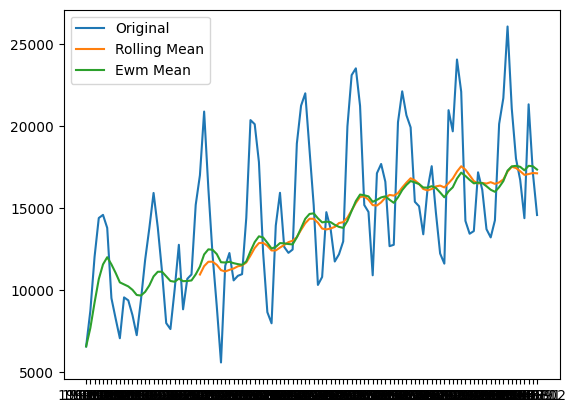

In [ ]:
plt.plot(data, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(ewm, label='Ewm Mean')
plt.legend()
plt.show()

**SEANCE 2 /:TTIME SERIES 14/04/**

In [ ]:

data = pd.read_csv(r'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-mean-temp.csv')
data

Month  Temperature
0    1920-01         40.6
1    1920-02         40.8
2    1920-03         44.4
3    1920-04         46.7
4    1920-05         54.1
..       ...          ...
235  1939-08         61.8
236  1939-09         58.2
237  1939-10         46.7
238  1939-11         46.6
239  1939-12         37.8

[240 rows x 2 columns]

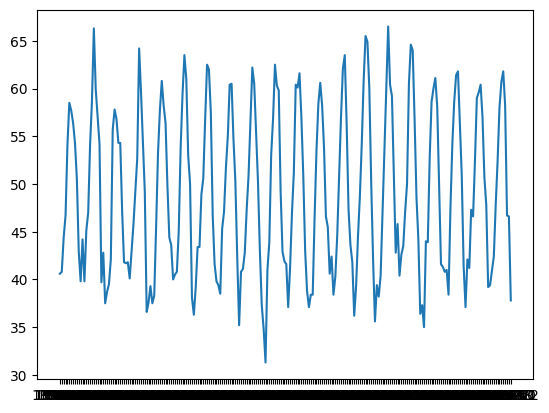

In [ ]:
# tracer la temperature par mois
plt.plot (data['Month'],data['Temperature'])
plt.show()

In [ ]:
# convertir et indexer la time serie 
data['Month'] = pd.to_datetime(data ['Month'])
data=data.set_index('Month')                      

KeyError: ignored

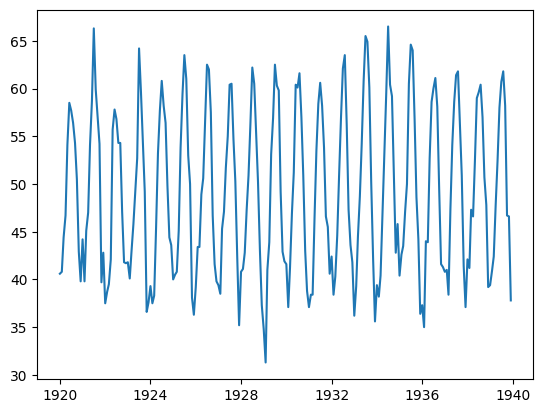

In [ ]:
#Representation après changement en datetime:
plt.plot(data)
plt.show()

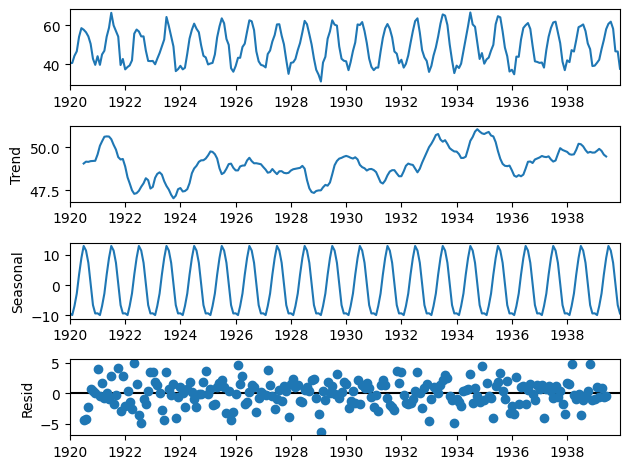

In [ ]:
# aller decouvrir et tester seasonal_decompose de statsmodel
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(data)
res.plot()
res = seasonal_decompose(data)

La décomposition de la série temporelle est une méthode d'analyse qui permet de décomposer une série temporelle en ses composantes saisonnières, tendancielles et aléatoires. Cette méthode est utile pour comprendre les différents modèles de variation des données et pour effectuer des prévisions futures.

La méthode de décomposition est basée sur l'hypothèse que la série temporelle peut être divisée en quatre composantes :

Tendance : c'est la direction générale de la série temporelle, qui peut être croissante, décroissante ou stable.

Saisonnalité : c'est la variation régulière de la série temporelle qui se répète à des intervalles réguliers. Par exemple, les ventes de jouets augmentent pendant la période des fêtes de fin d'année.

Cycle : c'est la variation régulière de la série temporelle qui se répète à des intervalles irréguliers. Par exemple, les fluctuations économiques qui se produisent tous les quelques années.

Résidu : c'est la variation non expliquée de la série temporelle, qui est souvent considérée comme le bruit.

In [ ]:
# effectuer une decomposition temporel
# rendez-vous dans la documentation statsmodel.tsa


Tendance : Pour modéliser la tendance, vous pouvez utiliser des modèles de régression linéaire ou non linéaire pour estimer la direction générale de la série temporelle. Par exemple, si la tendance est croissante, vous pouvez utiliser une régression linéaire pour estimer la pente de la ligne de tendance et prédire la croissance future.

Saisonnalité : Pour modéliser la saisonnalité, vous pouvez utiliser des méthodes de lissage ou des modèles de régression saisonnière pour estimer les fluctuations régulières de la série temporelle. Par exemple, si la saisonnalité est annuelle, vous pouvez utiliser une moyenne mobile saisonnière pour lissage ou un modèle de régression saisonnière pour prédire les valeurs futures en fonction de la saison.

Fluctuations cycliques : Pour modéliser les fluctuations cycliques, vous pouvez utiliser des modèles ARIMA (AutoRégressive Integrated Moving Average) pour capturer les changements irréguliers dans la série temporelle. Les modèles ARIMA sont des modèles statistiques qui peuvent capturer les tendances, les saisonnalités et les fluctuations cycliques de la série temporelle.

Variation aléatoire : Pour modéliser la variation aléatoire, vous pouvez utiliser des modèles de bruit blanc pour capturer les variations aléatoires de la série temporelle. Les modèles de bruit blanc sont des modèles statistiques qui supposent que les variations aléatoires sont indépendantes et identiquement distribuées.

#### stationarité

Dans le contexte de la stationnarité d'une série temporelle, l'hypothèse nulle est que la série temporelle est non-stationnaire, tandis que l'hypothèse alternative est que la série temporelle est stationnaire. Si la p-value est inférieure au seuil de signification choisi (par exemple, 0.05 ou 0.01), cela suggère que l'hypothèse nulle de non-stationnarité doit être rejetée et que la série temporelle est stationnaire.

## Exercice temperature New york

Quelle est la tendance générale des températures à New York sur la période étudiée ?

Y a-t-il une saisonnalité dans les températures à New York ? Si oui, quelle est la périodicité et l'amplitude ?

Les températures présentent-elles des fluctuations cycliques ou des irrégularités qui ne peuvent pas être expliquées par la tendance ou la saisonnalité ?

Explorer la stationarité. A quoi cela sert t elle ? trouver un moyen de tester statistiquement la stationarité. recherche ADF...

Peut-on prévoir les températures à New York pour les années à venir à l'aide d'un modèle de prévision ?

In [ ]:
df

A
2021-01-01  0.926595
2021-01-02  0.625930
2021-01-03  0.529143
2021-01-04  0.354090
2021-01-05  0.833362
...              ...
2021-12-27  0.719346
2021-12-28  0.523833
2021-12-29  0.322694
2021-12-30  0.467573
2021-12-31  0.266665

[365 rows x 1 columns]

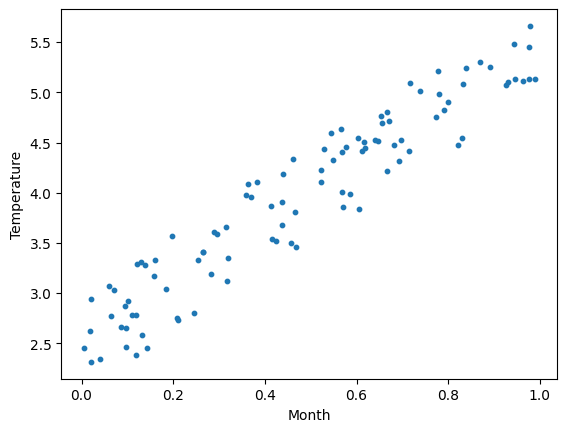

In [ ]:
# Tendance avec un regression linéaire simple
import numpy as np
import matplotlib.pyplot as plt
# générer un dataset aléatoire
np.random.seed(0)
Month = np.random.rand(100, 1)
Temperature= 2 + 3 * Month + np.random.rand(100, 1)
# tracer le graphique
plt.scatter(Month,Temperature,s=10)
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()


In [ ]:
#Saisonalite
data
#plt.plot(data['Month'], data['Temperature'],'ro',markersize =4)
#plt.show

Temperature
Month                  
1920-01-01         40.6
1920-02-01         40.8
1920-03-01         44.4
1920-04-01         46.7
1920-05-01         54.1
...                 ...
1939-08-01         61.8
1939-09-01         58.2
1939-10-01         46.7
1939-11-01         46.6
1939-12-01         37.8

[240 rows x 1 columns]

KeyError: ignored